In [1]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import confusion_matrix

In [62]:
df=pd.read_csv("Data_Final.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
X = df.drop(columns = ["User_id", "Bus_id", "Review", "State", "City", "Elite"])
y = df.Star
y

0        5.0
1        5.0
2        3.0
3        5.0
4        4.0
        ... 
53840    3.0
53841    5.0
53842    5.0
53843    5.0
53844    5.0
Name: Star, Length: 53845, dtype: float64

In [22]:
X_pca = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y)], axis = 1)
finalDf

,PC1,PC2,Star
0,-0.330647,0.267272,5.0
1,-0.759071,-0.203979,5.0
2,-0.173313,0.140384,3.0
3,-0.686882,-0.380439,5.0
4,0.296360,1.364137,4.0
...,...,...,...
53840,-0.737479,0.188083,3.0
53841,-0.034625,-0.741938,5.0
53842,-0.214722,-0.519447,5.0
53843,-0.401427,-1.169319,5.0


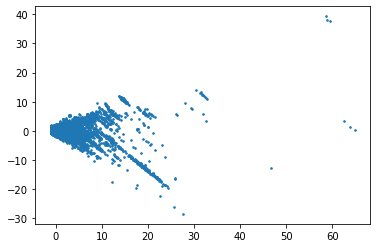

In [10]:
plt.scatter(finalDf.PC1,finalDf.PC2, s = 2.5)

<bound method _AxesBase.grid of <AxesSubplot:title={'center':'2 component PCA'}, xlabel='PC1', ylabel='PC2'>>

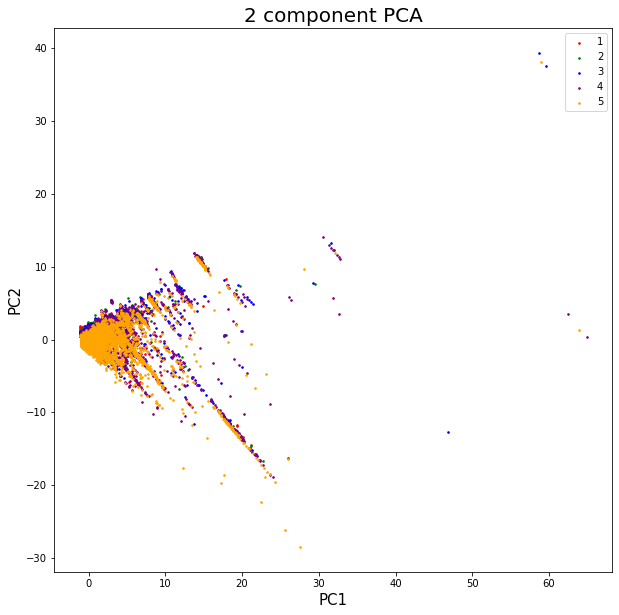

In [21]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'purple', 'orange']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf.Star == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],
               c = color, 
               s = 2.5)
ax.legend(targets)
ax.grid

In [26]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_res

,Star,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
0,1.0,0,0,0,4.0,160,157,74,13,1,1.98
1,1.0,0,0,0,4.5,157,362,92,66,2,3.40
2,1.0,1,0,0,3.5,345,86,27,35,3,3.90
3,1.0,1,1,3,2.5,509,2905,1208,1946,165,3.36
4,1.0,3,0,2,4.0,316,422,129,197,20,3.90
...,...,...,...,...,...,...,...,...,...,...,...
9480,5.0,11,7,2,4.5,691,2353,427,1361,23,4.74
9481,5.0,4,2,2,4.5,157,262,83,135,9,3.66
9482,5.0,0,0,0,4.0,1024,3559,1676,2125,158,4.08
9483,5.0,4,3,2,4.0,425,834,185,258,53,3.95


In [94]:
X_pca = StandardScaler().fit_transform(X_res)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_res)], axis = 1)
finalDf

,PC1,PC2,Star
0,-1.138946,0.050196,1.0
1,-1.003590,-0.074635,1.0
2,-0.875882,-0.032279,1.0
3,0.233002,0.233847,1.0
4,-0.562853,-0.360001,1.0
...,...,...,...
9480,0.763334,-1.028319,5.0
9481,-0.455550,-0.632258,5.0
9482,0.376891,1.076810,5.0
9483,-0.114930,-0.436752,5.0


<bound method _AxesBase.grid of <AxesSubplot:title={'center':'2 component PCA'}, xlabel='PC1', ylabel='PC2'>>

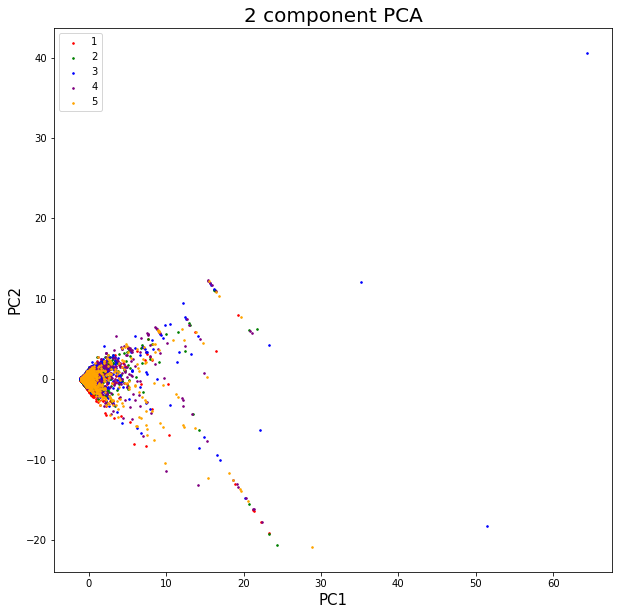

In [95]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'purple', 'orange']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf.Star == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],
               c = color, 
               s = 2.5)
ax.legend(targets)
ax.grid

In [96]:
sum(pca.explained_variance_ratio_)

0.6450928989779902

In [51]:
X = X_res
y = y_res


indexes = np.arange(0, 9485)
train_index = np.random.choice(indexes, 7588, replace = False)

test_index = []
for i in indexes:
    if i not in train_index:
        test_index.append(i)

        
X_train = X.iloc[train_index,:]
y_train = y[train_index]

X_test = X.iloc[test_index,:]
y_test = y[test_index]

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
knn_model.score(X_test, y_test)

0.3326304691618345

In [54]:
ypred = knn_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         1.0       0.36      0.43      0.39       385
         2.0       0.30      0.34      0.32       393
         3.0       0.27      0.32      0.30       355
         4.0       0.34      0.28      0.31       393
         5.0       0.42      0.29      0.34       371

    accuracy                           0.33      1897
   macro avg       0.34      0.33      0.33      1897
weighted avg       0.34      0.33      0.33      1897



In [55]:
i = 1
scores = []
while i < 89:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))
    i += 2

In [56]:
max_index = scores.index(max(scores))
max_index = max_index * 2 + 1
knn_model = KNeighborsClassifier(n_neighbors = max_index)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
knn_model.score(X_test,y_test)

0.40168687401159725

In [58]:
ypred = knn_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         1.0       0.51      0.45      0.48       385
         2.0       0.39      0.39      0.39       393
         3.0       0.32      0.39      0.35       355
         4.0       0.38      0.39      0.39       393
         5.0       0.45      0.39      0.41       371

    accuracy                           0.40      1897
   macro avg       0.41      0.40      0.40      1897
weighted avg       0.41      0.40      0.40      1897



In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string

In [81]:
documents = []
X = df.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [82]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents)
df['review_clean']=documents

In [86]:
td = pd.DataFrame(X.todense()) 
td.columns = vectorizer.get_feature_names_out()

In [87]:
## Used the website below for this method
## https://towardsdatascience.com/nmf-a-visual-explainer-and-python-implementation-7ecdd73491f8
def display_topics(model, feature_names, num_top_words, topic_names=None):

    for ix, topic in enumerate(model.components_):
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
            
        print(", ".join([feature_names[i] \
        for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [88]:
## Not sure if this can be used in any of the model's you made but this makes topics of words that often appear
## together, but i don't know how to implement this into our classifcation alg

## Change number for how many topics you want
nmf_model = NMF(15)
# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
doc_topic = nmf_model.fit_transform(td)
# Extract top words from the topic-term matrix 'H' 
## Can edit the number at the end to pick how many words you want
display_topics(nmf_model, td.columns, 10)


Topic  0
wa, came, got, ordered, could, first, service, bit, made, night

Topic  1
time, first, next, always, day, ha, make, service, experience, even

Topic  2
good, pretty, service, price, flavor, bit, fresh, got, better, try

Topic  3
place, go, try, love, ha, pretty, best, friend, definitely, people

Topic  4
food, service, restaurant, price, delicious, amazing, better, fresh, best, come

Topic  5
santa, barbara, restaurant, ha, day, area, best, see, take, way

Topic  6
great, service, friendly, spot, staff, love, always, experience, amazing, well

Topic  7
like, little, much, thing, people, flavor, think, know, lot, even

Topic  8
one, two, best, thing, ha, even, night, day, well, know

Topic  9
get, go, people, want, make, even, way, take, know, always

Topic  10
really, got, lot, pretty, think, definitely, thing, much, try, know

Topic  11
also, delicious, love, flavor, well, fresh, try, definitely, amazing, ha

Topic  12
would, back, go, come, day, definitely, could, even, way